In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel,RBF,GenericKernelMixin
from sklearn.linear_model import LinearRegression
import os
from sklearn.model_selection import GridSearchCV,LeaveOneGroupOut
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
def create_data(EIS_files,Capacity_files,Battery_Num):
    # 创建一个1*122的全0数组
    dataset = np.zeros(shape=(1,123))
    
    features_path = 'D:/batter ai/jupyter/EIS data/EIS data/' + str(EIS_files)
    targets_path = 'D:/batter ai/jupyter/Capacity data/Capacity data/' + str(Capacity_files)
    features_data = pd.read_csv(features_path,delimiter='\t')
    targets_data = pd.read_csv(targets_path,delimiter = '\t')
    
    Data1 = []
    features_data.columns = features_data.columns.str.strip()  # 去除列名前后的空格
   # print(features_data.columns) # 打印特征列名
    targets_data.columns = targets_data.columns.str.strip()  # 去除列名前后的空格
   # print(int(features_data['cycle number'].min()),int(features_data['cycle number'].max()))
   # print(targets_data.columns) # 打印目标列名
   # print(int(targets_data['cycle number'].min()),int(targets_data['cycle number'].max()))
    for i in range(int(features_data['cycle number'].min()),int(features_data['cycle number'].max())+1):
        try:
           # print('走了try')
            
            features = features_data[features_data.iloc[:,1]==i]
           
          #  print('可以比')
            features = features.iloc[:,3:5]
          #  print(features)
          #  print('features提取没有问题')
            re = features.iloc[:,0]
            im = features.iloc[:,1]
           # print(re)
           # print('re,im提取没有问题')
            # capacity用列表包装确保维度一致
            capacity = [targets_data[targets_data['cycle number']==i]['Capacity/mA.h'].values[-1]]
            cycle_numble = [targets_data[targets_data['cycle number']==i]['cycle number'].values[-1]]
           # print('capacity提取没有问题')
           
            tot = np.concatenate([re,im,capacity,[Battery_Num],cycle_numble],axis = 0)
#             print(re)
#             print('------------tot------------------------')
#             print(tot)
           # print('concatenate拼接没有问题')
            
        except:
           # print('?')
            break
       # print(tot.shape) # 这里还是行
        Data1.append(tot) 
      #  print(Data1.shape) 失败，因为Data1是list没有.shape
        
    Data1 = np.array(Data1) # np.array是多维数组结构类似list
    print(Data1.shape) # 这里就变成维度了
    dataset = np.concatenate([dataset,Data1],axis=0)
    dataset = pd.DataFrame(dataset) # pd.DataFrame是二维表格数据
    
    
    columns=[]
    for i in range(1,61):
        columns.append('Real Z'+str(i))
    
    for i in range(1,61):
        columns.append('Imaginary Z'+str(i))   
    
    columns.extend(['Capacity','Battery Number','cycle numble'])
    
    
    dataset.columns=columns
    
    return dataset.iloc[1:,:]

In [4]:
EIS_Data = os.listdir(path ='D:/batter ai/jupyter/EIS Data/EIS Data')
# print(EIS_Data)
Capacity_Data = os.listdir(path='D:/batter ai/jupyter/Capacity data/Capacity data')
Capacity_Data = Capacity_Data[0:] # 为什么从1开始 ,修改成从0开始

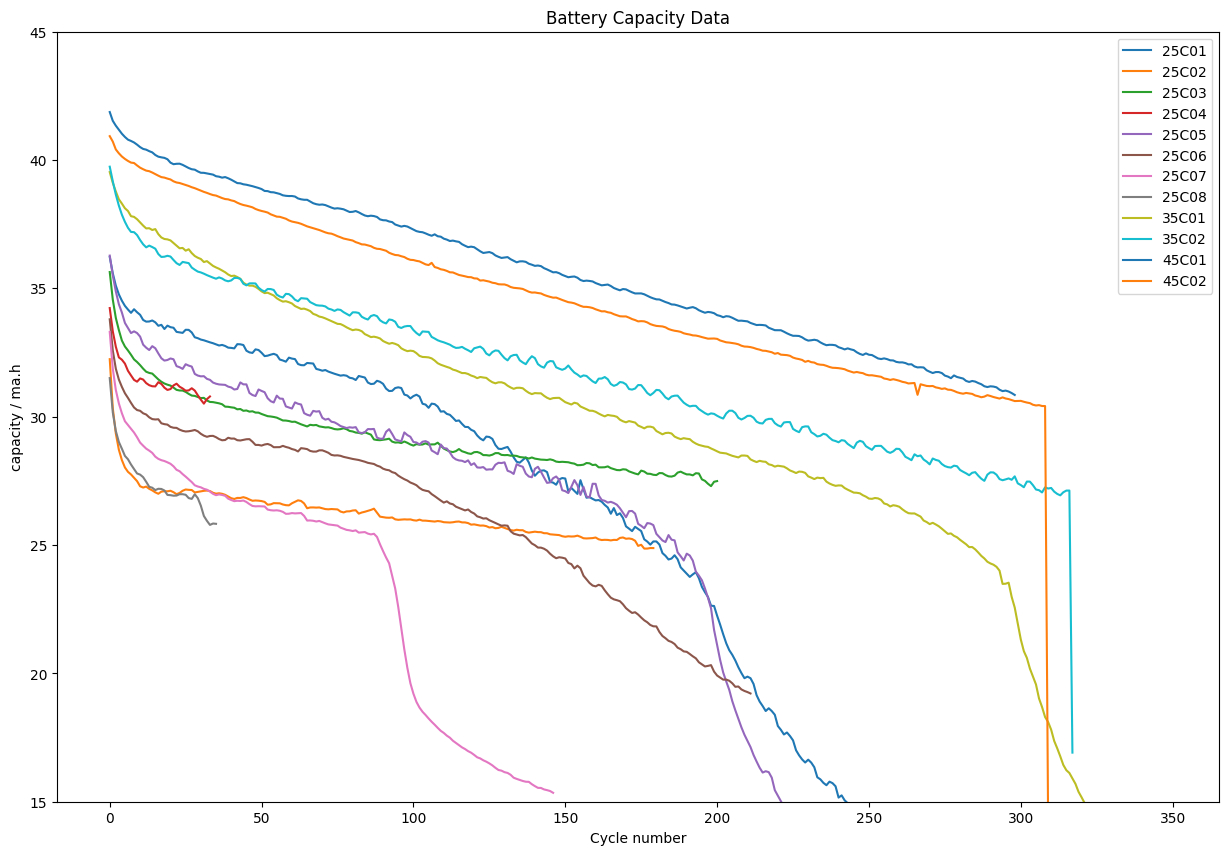

In [5]:
plt.figure(figsize=(15,10))
plt.ylim([15,45])
plt.title(label = 'Battery Capacity Data')
plt.xlabel('Cycle number')
plt.ylabel('capacity / ma.h')

for i in Capacity_Data:
    path = 'D:/batter ai/jupyter/Capacity Data/Capacity data/' + i
    cap = pd.read_csv(path,delimiter='\t')
    cap.columns = cap.columns.str.strip()  # 去除列名前后的空格
#     print(i)
#     print(cap.columns)
    Y_cap = []
    for j in range(1,int(cap['cycle number'].max()+1)):
        capacity = [cap[cap['cycle number']==j]['Capacity/mA.h'].values[-1]]
        Y_cap.append(capacity)
    plt.plot(Y_cap,label=i[14:19])
    
plt.legend()
# plt.savefig('Battery_capacity_Data.jpeg',dpi=1200)


In [6]:
EIS_State5 = []
for i in EIS_Data:
    if i[10:12]=='V_':
        EIS_State5.append(i)
EIS_State5

['EIS_state_V_25C01.txt',
 'EIS_state_V_25C02.txt',
 'EIS_state_V_25C03.txt',
 'EIS_state_V_25C04.txt',
 'EIS_state_V_25C05.txt',
 'EIS_state_V_25C06.txt',
 'EIS_state_V_25C07.txt',
 'EIS_state_V_25C08.txt',
 'EIS_state_V_35C01.txt',
 'EIS_state_V_35C02.txt',
 'EIS_state_V_45C01.txt',
 'EIS_state_V_45C02.txt']

In [7]:
C1_25=create_data(EIS_State5[0],Capacity_Data[0],1)
C2_25=create_data(EIS_State5[1],Capacity_Data[1],2)
C3_25=create_data(EIS_State5[2],Capacity_Data[2],3)
C4_25=create_data(EIS_State5[3],Capacity_Data[3],4)
C5_25=create_data(EIS_State5[4],Capacity_Data[4],5)
C6_25=create_data(EIS_State5[5],Capacity_Data[5],6)
C7_25=create_data(EIS_State5[6],Capacity_Data[6],7)
C8_25=create_data(EIS_State5[7],Capacity_Data[7],8)
C1_35=create_data(EIS_State5[8],Capacity_Data[8],9)
C2_35=create_data(EIS_State5[9],Capacity_Data[9],10)
C1_45=create_data(EIS_State5[10],Capacity_Data[10],11)
C2_45=create_data(EIS_State5[11],Capacity_Data[11],12)
Capacity_Data[4]

(261, 123)
(180, 123)
(201, 123)
(34, 123)
(275, 123)
(212, 123)
(140, 123)
(36, 123)
(326, 123)
(318, 123)
(299, 123)
(310, 123)


'Data_Capacity_25C05.txt'

In [8]:
Training_Data = pd.concat([C1_25,C2_25,C3_25,C4_25],ignore_index=True)

In [9]:
Training_Data

,Real Z1,Real Z2,Real Z3,Real Z4,Real Z5,Real Z6,Real Z7,Real Z8,Real Z9,Real Z10,...,Imaginary Z54,Imaginary Z55,Imaginary Z56,Imaginary Z57,Imaginary Z58,Imaginary Z59,Imaginary Z60,Capacity,Battery Number,cycle numble
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795,36.223033,1.0,1.0
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300,35.589301,1.0,2.0
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955,35.108081,1.0,3.0
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673,34.767280,1.0,4.0
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562,34.519144,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.27138,0.28076,0.28845,0.29698,0.30578,0.31691,0.32691,0.34161,0.35458,0.36950,...,0.17034,0.19362,0.22699,0.26743,0.30842,0.34865,0.39717,30.835089,4.0,30.0
672,0.27160,0.27940,0.28738,0.29469,0.30743,0.31678,0.32865,0.34171,0.35283,0.36809,...,0.17240,0.19800,0.22474,0.25425,0.29612,0.35222,0.41497,30.663490,4.0,31.0
673,0.27110,0.27859,0.28776,0.29647,0.30565,0.31671,0.32771,0.34205,0.35391,0.36731,...,0.17603,0.19830,0.22592,0.26191,0.30113,0.34236,0.39416,30.510570,4.0,32.0
674,0.27385,0.27906,0.28844,0.29597,0.30659,0.31676,0.32849,0.34203,0.35573,0.36959,...,0.17238,0.19807,0.23291,0.27059,0.30745,0.34862,0.40215,30.684311,4.0,33.0


### 数据处理： 移除不想要的输入

In [10]:
Diff = np.diff(C7_25['Capacity'],n=1)
Limit = np.argmin(Diff[20:])+20 # 这里一阶差分的最小值暗示电池容量的突然下降，偏移量为20
C7_25.drop(index=range(Limit,C7_25.shape[0]+1),inplace = True)
# Diff = np.diff(C5_25['Capacity'],n=1)
# Limit = np.argmin(Diff[20:])+20
# C5_25.drop(index=range(Limit,C5_25.shape[0]+1),inplace = True)

### 训练集与测试集

In [44]:
# print(Training_Data)
X_train=Training_Data.iloc[:,0:120]
y_train=Training_Data['Capacity'].values.reshape(-1,1)
groups=Training_Data['Battery Number'].values.astype(int)
C5_features=C5_25.iloc[:,0:120]
C5_Capacity=C5_25['Capacity'].values
C6_features=C6_25.iloc[:,0:120]
C6_Capacity=C6_25['Capacity'].values
C7_features=C7_25.iloc[:,0:120]
C7_Capacity=C7_25['Capacity'].values
C8_features=C8_25.iloc[:,0:120]
C8_Capacity=C8_25['Capacity'].values
print(X_train.shape)
print(y_train.shape)

(676, 120)
(676, 1)


In [35]:
Testing_Data=pd.concat([C5_25,C6_25,C7_25,C8_25],ignore_index=True) # 默认axis=0
Testing_Data

,Real Z1,Real Z2,Real Z3,Real Z4,Real Z5,Real Z6,Real Z7,Real Z8,Real Z9,Real Z10,...,Imaginary Z54,Imaginary Z55,Imaginary Z56,Imaginary Z57,Imaginary Z58,Imaginary Z59,Imaginary Z60,Capacity,Battery Number,cycle numble
0,0.34630,0.35399,0.35952,0.36615,0.37339,0.38047,0.38829,0.39610,0.40643,0.41652,...,0.13602,0.15592,0.17752,0.20654,0.23916,0.27151,0.31109,36.276499,5.0,1.0
1,0.36317,0.36888,0.37549,0.38305,0.39220,0.39717,0.40625,0.41517,0.42411,0.43423,...,0.13783,0.15947,0.18010,0.20880,0.24306,0.27750,0.31452,35.508299,5.0,2.0
2,0.37289,0.37757,0.38343,0.39077,0.39943,0.40645,0.41348,0.42535,0.43215,0.44246,...,0.13775,0.15808,0.18123,0.21131,0.24375,0.27644,0.31707,34.883616,5.0,3.0
3,0.37524,0.38002,0.38841,0.39615,0.40342,0.40956,0.41859,0.42844,0.43765,0.44689,...,0.14008,0.16186,0.18189,0.21038,0.24595,0.28111,0.31775,34.384028,5.0,4.0
4,0.37643,0.38435,0.38857,0.39678,0.40292,0.41160,0.41982,0.42830,0.43909,0.44923,...,0.13845,0.16441,0.18814,0.21364,0.24514,0.28419,0.32628,34.059011,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,0.29439,0.29988,0.31054,0.32082,0.33014,0.34063,0.35285,0.36589,0.37902,0.39558,...,0.18565,0.21169,0.23712,0.26964,0.31751,0.37721,0.43654,26.132831,8.0,32.0
614,0.29341,0.30111,0.31036,0.31984,0.33009,0.34109,0.35297,0.36560,0.37926,0.39409,...,0.19003,0.21750,0.24306,0.27453,0.31837,0.36985,0.42101,25.944533,8.0,33.0
615,0.29167,0.29918,0.30999,0.31893,0.32766,0.34011,0.35446,0.36584,0.38069,0.39511,...,0.18896,0.21143,0.24007,0.27821,0.32049,0.36270,0.41746,25.785219,8.0,34.0
616,0.29397,0.30078,0.30868,0.31924,0.32921,0.34087,0.35359,0.36400,0.38008,0.39477,...,0.18939,0.21825,0.24707,0.27791,0.31827,0.37070,0.42692,25.838960,8.0,35.0


In [36]:
New_Train=pd.concat([C2_25,C3_25,C4_25],axis=0,ignore_index=True)
X_new_train=New_Train.iloc[:,0:120]
y_new_train=New_Train['Capacity'].values

In [37]:
X_test=Testing_Data.iloc[:,0:120]
y_test=Testing_Data['Capacity'].values
# X_test
# y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(676, 120)
(676, 1)
(618, 120)
(618,)


In [38]:

'''
scaler_x=StandardScaler()
scaler_y=StandardScaler()

X_train=scaler_x.fit_transform(X_train)
y_train=scaler_y.fit_transform(y_train)
X_test=scaler_x.transform(X_test)

'''


'\nscaler_x=StandardScaler()\nscaler_y=StandardScaler()\n\nX_train=scaler_x.fit_transform(X_train)\ny_train=scaler_y.fit_transform(y_train)\nX_test=scaler_x.transform(X_test)\n\n'

In [39]:
gp=GaussianProcessRegressor(alpha=100,kernel=5*RBF(),n_restarts_optimizer=5)# 正则化参数，核函数，优化器的重启次数


In [40]:
gp.fit(X_train,y_train)


GaussianProcessRegressor(alpha=100, kernel=2.24**2 * RBF(length_scale=1),
                         n_restarts_optimizer=5)

In [41]:
y_pred=gp.predict(X_test)
print(y_test.shape)
print(y_pred.shape)
# pd.DataFrame([y_test,y_pred])
# pd.DataFrame([y_test_fig31,y_pred_fig31])

(618,)
(618,)


r^2 =  0.9518504111901059
rmse =  0.9376839222124027


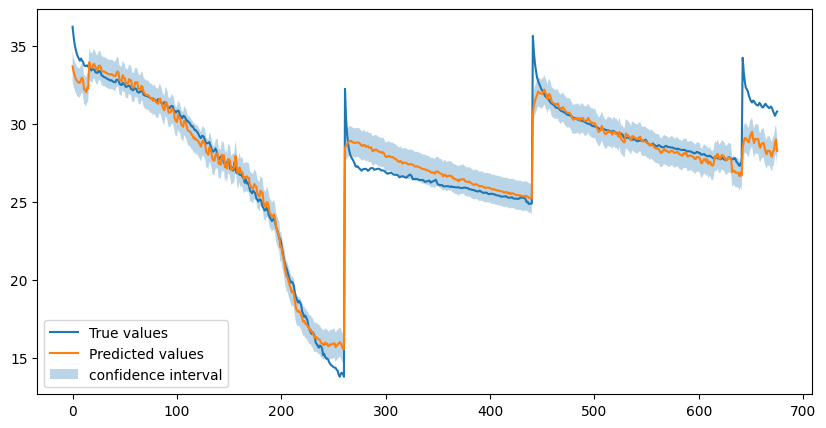

r^2 =  0.926993368085747
rmse =  2.103804456225624


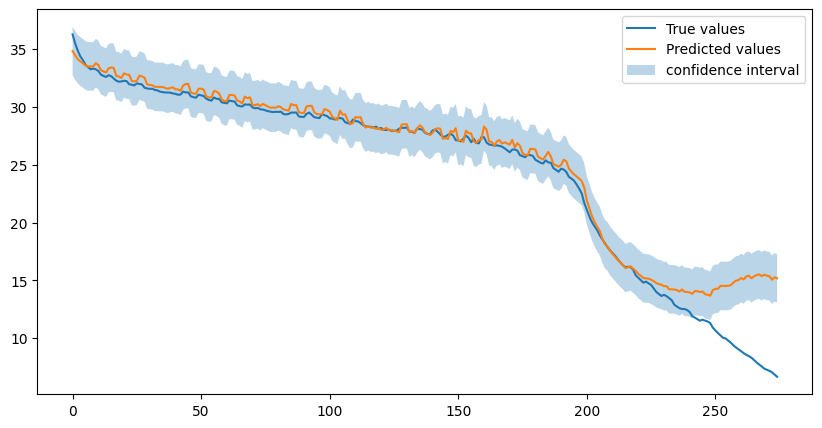

r^2 =  0.570239410252891
rmse =  2.2060123308475323


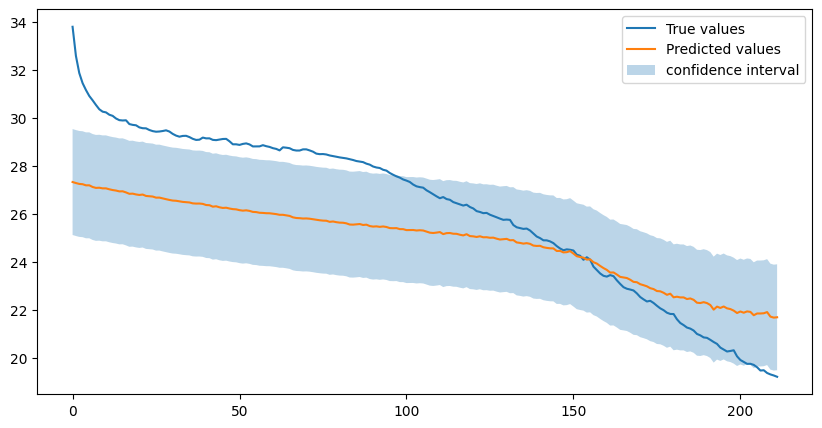

r^2 =  0.12042972314311484
rmse =  1.55854251600975


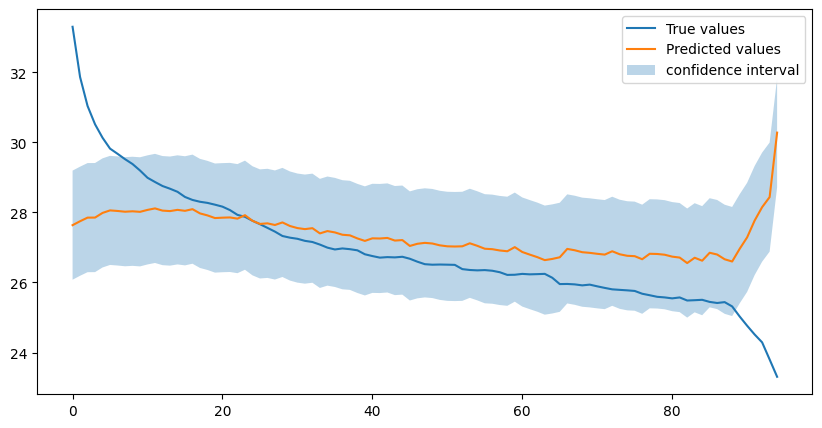

r^2 =  -3.65738544449189
rmse =  2.573728034267122


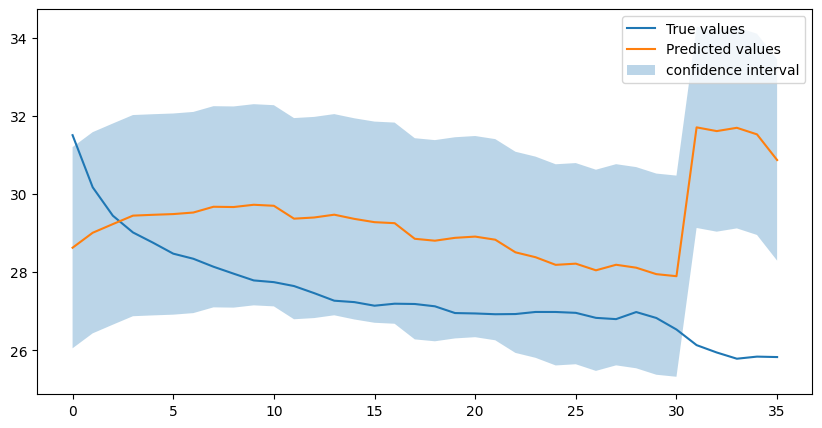

In [45]:
testing_cells=[X_train,C5_features,C6_features,C7_features,C8_features]
testing_caps=[y_train,C5_Capacity,C6_Capacity,C7_Capacity,C8_Capacity]
for i,j in zip(testing_cells,testing_caps):
    y_pred=gp.predict(i)
    rmse = np.sqrt(mean_squared_error(j,y_pred))
    print('r^2 = ',r2_score(j,y_pred))
    print('rmse = ',rmse)
    plt.figure(figsize=(10,5))
    plt.plot(j,label = 'True values')
    plt.plot(y_pred,label = 'Predicted values')
    # 绘制置信区间
    confidence_interval = 1
    upper_bound = y_pred + confidence_interval*rmse
    lower_bound = y_pred - confidence_interval*rmse
    plt.fill_between(range(len(j)),upper_bound,lower_bound,alpha=0.3,label='confidence interval')
    plt.legend()
    plt.show()

# # 尝试复现fig1.1
# # print(C5_25)
# X_fig11_test = C5_25.iloc[:,0:120]
# # X_new_test
# y_fig11_test = C5_25['Capacity'].values
# y_fig11_pred = gp.predict(X_fig11_test)


# scaler = MinMaxScaler()
# y_fig11_test_normalized = scaler.fit_transform(y_fig11_test.reshape(-1, 1))
# y_fig11_pred_normalized = scaler.transform(y_fig11_pred.reshape(-1, 1))

# rmse = np.sqrt(mean_squared_error(y_fig11_test,y_fig11_pred))
# print('rmse = ',rmse)
# print('r^2 = ',r2_score(y_fig11_test,y_fig11_pred))
# plt.figure(figsize=(10,5))
# # plt.ylim([0.6, 1.045])

# plt.plot(np.arange(2, 552, 2),y_fig11_test,label = 'True values')
# plt.plot(np.arange(2, 552, 2),y_fig11_pred ,label = 'Predicted values')
# # # 绘制置信区间
# # confidence_interval = 1
# # upper_bound = y_fig11_pred/y_fig11_pred[0] + confidence_interval*rmse
# # lower_bound = y_fig11_pred/y_fig11_pred[0] - confidence_interval*rmse
# # plt.fill_between(range(len(y_fig11_test/y_fig11_test[0])),upper_bound,lower_bound,alpha=0.3,label='confidence interval')
# # plt.legend()
# # plt.show()



